In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("ToyotaCorolla.csv",encoding="latin")
df.head()
df.shape

(1436, 38)

In [3]:
  # List of column indexes to drop
column_indexes_to_drop = [0, 1, 4, 5, 7, 9, 10, 11, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

# Drop the specified columns by index from the DataFrame

df = df.drop(df.columns[column_indexes_to_drop], axis=1)


# df now contains only the remaining columns
df
df.info()
df.isna().sum()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


(1436, 9)

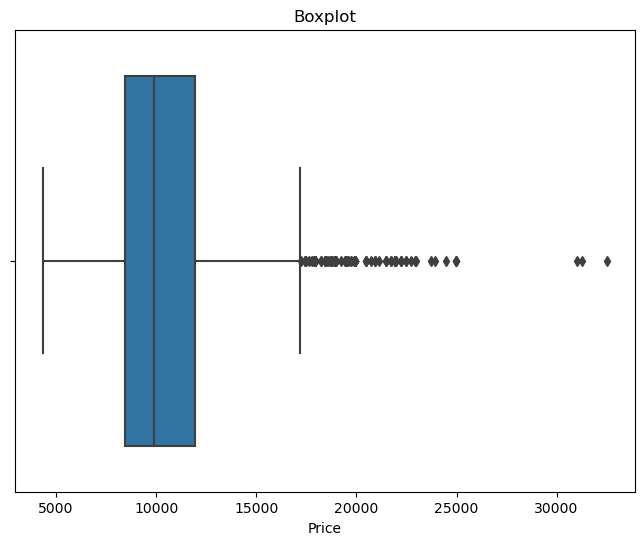

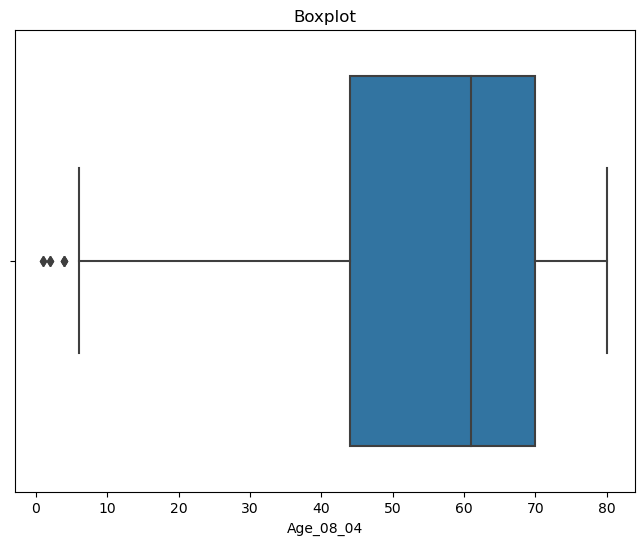

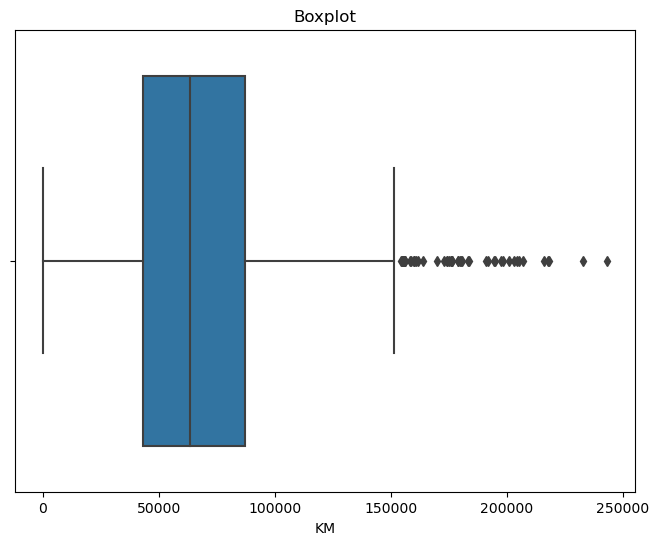

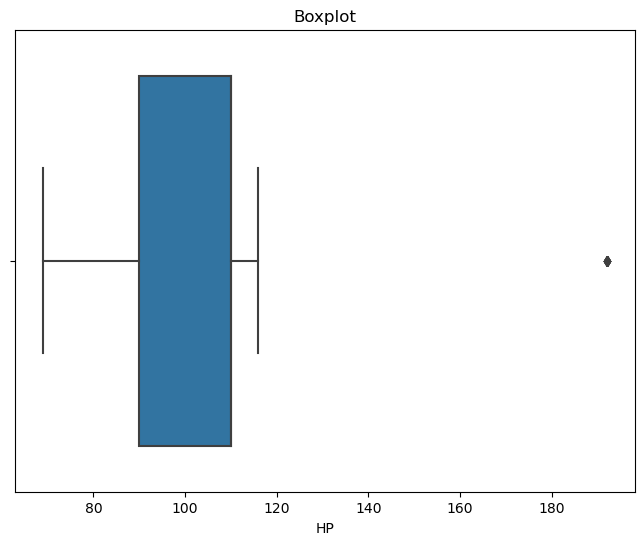

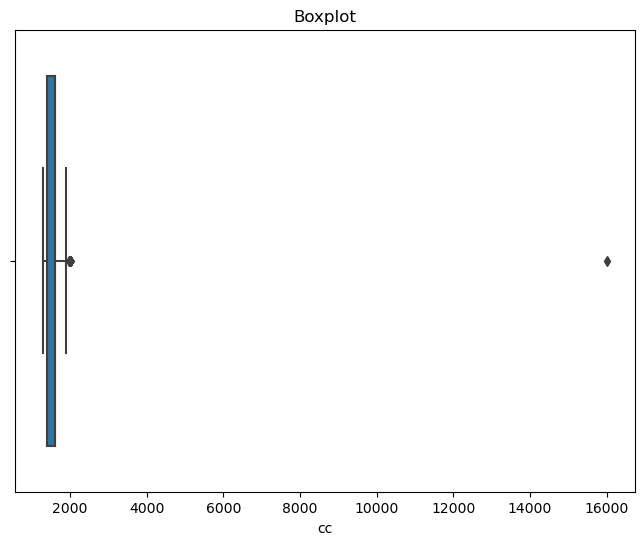

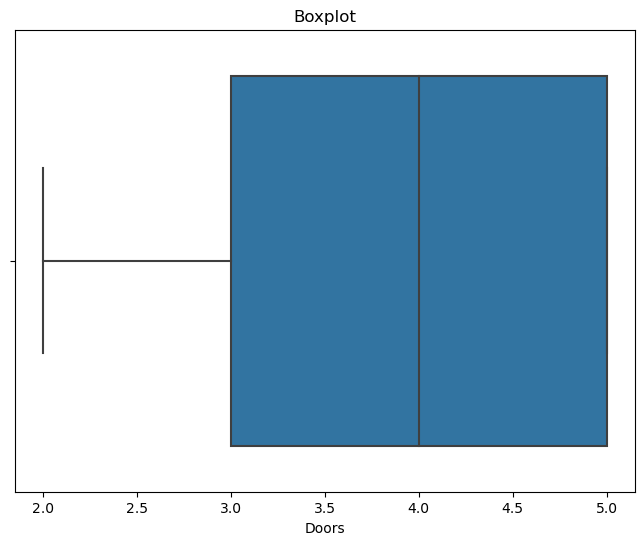

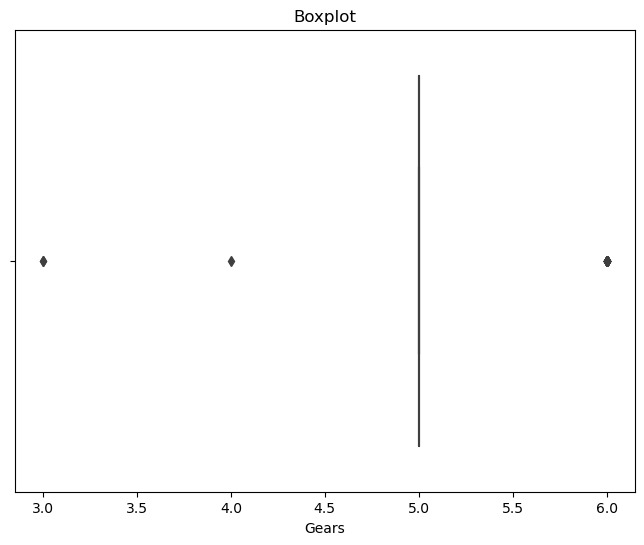

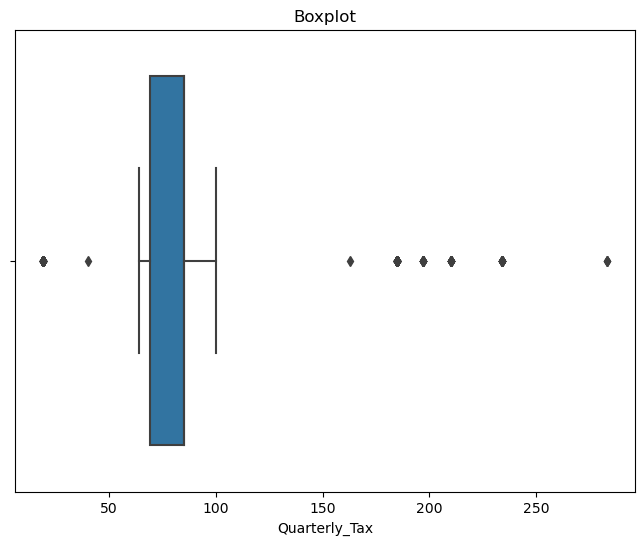

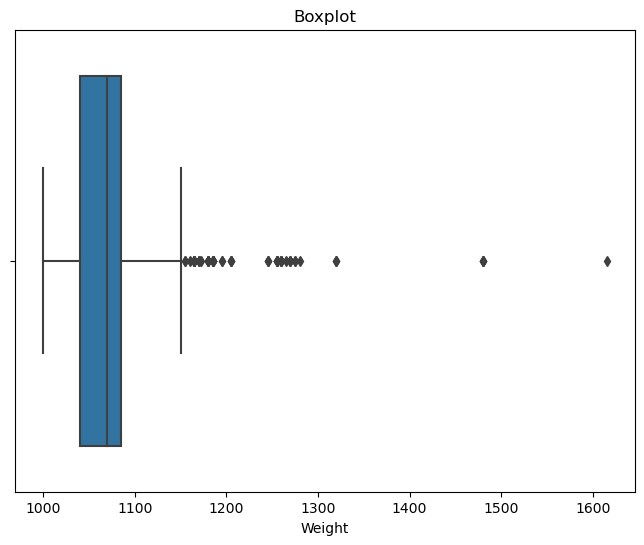

In [4]:
#EDA

data=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
for column in data:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[column])
  plt.title("Boxplot")
  plt.show()

In [5]:
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = ['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = df.copy()
for columns in continuous_columns:
    Q1 = data_without_outliers[column].quantile(0.25)
    Q3 = data_without_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR
    data_without_outliers = data_without_outliers[(data_without_outliers[column] >= lower_whisker_Length) & (data_without_outliers[column]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)#[1363 rows x 9 columns]
df = data_without_outliers
df.shape#(1363, 9)
df.info()
df.head()

      Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
9     12950         23  71138   69  1900      3      5            185    1105
17    17950         24  21716  110  1600      3      5             85    1105
18    16750         24  25563  110  1600      3      5             19    1065
19    16950         30  64359  110  1600      3      5             85    1105
20    15950         30  67660  110  1600      3      5             85    1105
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1363 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
I

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
9,12950,23,71138,69,1900,3,5,185,1105
17,17950,24,21716,110,1600,3,5,85,1105
18,16750,24,25563,110,1600,3,5,19,1065
19,16950,30,64359,110,1600,3,5,85,1105
20,15950,30,67660,110,1600,3,5,85,1105


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000,1363.000000
mean,10354.518709,57.374175,68998.900954,100.991196,1549.303008,4.026412,5.022744,82.615554,1064.097579
std,3050.387668,17.540831,36581.848585,12.706269,171.400009,0.951484,0.180339,33.549365,33.285950
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8250.000000,48.000000,43710.000000,86.000000,1400.000000,3.000000,5.000000,69.000000,1035.000000
50%,9750.000000,61.000000,64000.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1065.000000
75%,11500.000000,71.000000,87633.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1080.000000
max,24500.000000,80.000000,243000.000000,116.000000,2000.000000,5.000000,6.000000,197.000000,1140.000000


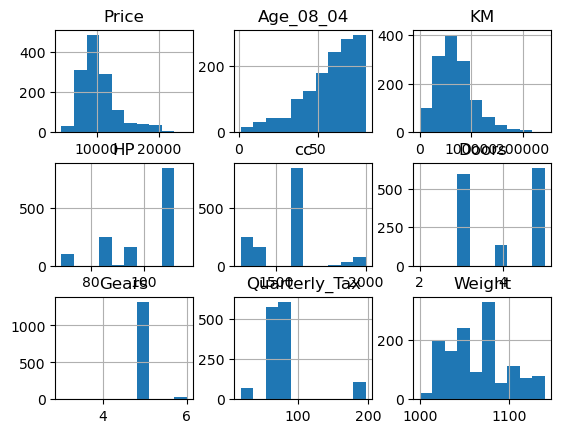

In [6]:
# constructing histograms,calculating skewness and kurtosis values#

df.hist()
df.skew()
df.kurt()
df.describe()


In [7]:
df.shape

(1363, 9)

In [8]:
X=df.iloc[:,1:9]
Y=df.iloc[:,0:1]

In [9]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
SS_X=SC.fit_transform(X)
SS_X=pd.DataFrame(SS_X)

SS_Y=SC.fit_transform(Y)
SS_Y=pd.DataFrame(SS_Y)

SS_X.columns=list(X)
SS_Y.columns=list(Y)


In [10]:
""" to identify the correlation in the form of a table between the all independent and dependent variable """
pd.set_option('display.max_columns', None)
df1 = pd.concat([SS_X,SS_Y],axis = 1)

df1.corr()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.501743,-0.102495,-0.000740,-0.154124,0.029338,-0.027987,-0.389938,-0.879520
KM,0.501743,1.000000,-0.327327,0.358315,-0.050400,0.041135,0.388430,0.067332,-0.597993
HP,-0.102495,-0.327327,1.000000,0.040302,0.139516,0.074104,-0.409658,0.008974,0.228846
cc,-0.000740,0.358315,0.040302,1.000000,0.128701,0.023079,0.610224,0.676346,-0.013269
Doors,-0.154124,-0.050400,0.139516,0.128701,1.000000,-0.153265,0.102118,0.437952,0.201884
Gears,0.029338,0.041135,0.074104,0.023079,-0.153265,1.000000,-0.001345,-0.029970,0.000327
Quarterly_Tax,-0.027987,0.388430,-0.409658,0.610224,0.102118,-0.001345,1.000000,0.527060,-0.023759
Weight,-0.389938,0.067332,0.008974,0.676346,0.437952,-0.029970,0.527060,1.000000,0.435973
Price,-0.879520,-0.597993,0.228846,-0.013269,0.201884,0.000327,-0.023759,0.435973,1.000000


In [11]:
X=SS_X[["Age_08_04"]]
Y=SS_Y[["Price"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
R2=r2_score(Y,Y_pred)
print("R2",R2*100)


RMSE 0.476
R2 77.3554984443772


In [12]:
""" VIF (variance influence factor is one of the metric which is used to calculate the relationship between  the two independent variables in order to see
there is a presence of multi collinearity, if exists it will effect the accuracy score of the model. so the vif factor ranges follows as below mentioned
VIF = 1/1-r2 ,VIF < 5 no multi collinearity
VIF : 5- 10  some multi collinearity issues will be present but can be accepted
VIF > 10 not at all acceptable """
Y=SS_X[["Age_08_04"]]
X=SS_X[["KM"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)

VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["Age_08_04"]]
X=SS_X[["HP"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)

VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["KM"]]
X=SS_X[["HP"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)

VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)

Y=SS_Y[["Price"]]
X=SS_X[["Age_08_04","KM","HP"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2*100)






RMSE 0.865
R2 0.773554984443772
Variance Influence Factor:  1.336444714768849
RMSE 0.995
R2 0.773554984443772
Variance Influence Factor:  1.0106168073460788
RMSE 0.945
R2 0.773554984443772
Variance Influence Factor:  1.1200004458505162
RMSE 0.432
R2 77.3554984443772


In [13]:
Y=SS_X[["cc"]]
X=SS_X[["KM"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)

VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)

Y=SS_X[["Age_08_04"]]
X=SS_X[["cc"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["HP"]]
X=SS_X[["cc"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)

VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)



Y=SS_Y[["Price"]]
X=SS_X[["Age_08_04","HP","KM","cc"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)



RMSE 0.934
R2 0.773554984443772
Variance Influence Factor:  1.1473020467023818
RMSE 1.0
R2 0.773554984443772
Variance Influence Factor:  1.0000005473633573
RMSE 0.999
R2 0.773554984443772
Variance Influence Factor:  1.001626929567329
RMSE 0.429
R2 0.773554984443772


In [14]:
Y=SS_X[["Doors"]]
X=SS_X[["Age_08_04"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)



Y=SS_X[["Doors"]]
X=SS_X[["KM"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)



Y=SS_X[["Doors"]]
X=SS_X[["HP"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)



Y=SS_X[["Doors"]]
X=SS_X[["cc"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)




Y=SS_Y[["Price"]]
X=SS_X[["Age_08_04","HP","KM","cc","Doors"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)


RMSE 0.988
R2 0.773554984443772
Variance Influence Factor:  1.0243321146000455
RMSE 0.999
R2 0.773554984443772
Variance Influence Factor:  1.0025465926246604
RMSE 0.99
R2 0.773554984443772
Variance Influence Factor:  1.0198511216020565
RMSE 0.992
R2 0.773554984443772
Variance Influence Factor:  1.0168428116668213
RMSE 0.425
R2 0.773554984443772


In [15]:
Y=SS_X[["Gears"]]
X=SS_X[["Age_08_04"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["Gears"]]
X=SS_X[["KM"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["Gears"]]
X=SS_X[["HP"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["Gears"]]
X=SS_X[["cc"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["Gears"]]
X=SS_X[["Doors"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)



Y=SS_Y[["Price"]]
X=SS_X[["Age_08_04","HP","KM","cc","Doors","Gears"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)




RMSE 1.0
R2 0.773554984443772
Variance Influence Factor:  1.000861470946914
RMSE 0.999
R2 0.773554984443772
Variance Influence Factor:  1.001694982785442
RMSE 0.997
R2 0.773554984443772
Variance Influence Factor:  1.0055217124009554
RMSE 1.0
R2 0.773554984443772
Variance Influence Factor:  1.0005329169617805
RMSE 0.988
R2 0.773554984443772
Variance Influence Factor:  1.024055287360224
RMSE 0.423
R2 0.773554984443772


In [16]:
Y=SS_X[["Quarterly_Tax"]]
X=SS_X[["Age_08_04"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["Quarterly_Tax"]]
X=SS_X[["KM"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)



Y=SS_X[["Quarterly_Tax"]]
X=SS_X[["HP"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["Quarterly_Tax"]]
X=SS_X[["cc"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["Quarterly_Tax"]]
X=SS_X[["Doors"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)

Y=SS_X[["Quarterly_Tax"]]
X=SS_X[["Gears"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_Y[["Price"]]
X=SS_X[["Age_08_04","HP","KM","cc","Doors","Gears","Quarterly_Tax"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)



RMSE 1.0
R2 0.773554984443772
Variance Influence Factor:  1.000783881741269
RMSE 0.921
R2 0.773554984443772
Variance Influence Factor:  1.1776871623540581
RMSE 0.912
R2 0.773554984443772
Variance Influence Factor:  1.2016623483867
RMSE 0.792
R2 0.773554984443772
Variance Influence Factor:  1.5933027300984512
RMSE 0.995
R2 0.773554984443772
Variance Influence Factor:  1.0105380736840655
RMSE 1.0
R2 0.773554984443772
Variance Influence Factor:  1.000001808634156
RMSE 0.421
R2 0.773554984443772


In [17]:
Y=SS_X[["Weight"]]
X=SS_X[["Age_08_04"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)

Y=SS_X[["Weight"]]
X=SS_X[["KM"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Y=SS_X[["Weight"]]
X=SS_X[["HP"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)




Y=SS_X[["Weight"]]
X=SS_X[["cc"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)




Y=SS_X[["Weight"]]
X=SS_X[["Doors"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)



Y=SS_X[["Weight"]]
X=SS_X[["Gears"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)




Y=SS_X[["Weight"]]
X=SS_X[["Quarterly_Tax"]]
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)





Y=SS_Y[["Price"]]
X=SS_X[["Age_08_04","HP","KM","cc","Doors","Gears","Quarterly_Tax","Weight"]]

from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X,Y)
Y_pred=LR.predict(X)
Y_pred

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y,Y_pred)
print("RMSE",np.sqrt(mse).round(3))

from sklearn.metrics import r2_score
r2=r2_score(Y,Y_pred)
print("R2",R2)





RMSE 0.921
R2 0.773554984443772
Variance Influence Factor:  1.1793165628383646
RMSE 0.998
R2 0.773554984443772
Variance Influence Factor:  1.0045541797596276
RMSE 1.0
R2 0.773554984443772
Variance Influence Factor:  1.0000805312722458
RMSE 0.737
R2 0.773554984443772
Variance Influence Factor:  1.8431278653161842
RMSE 0.899
R2 0.773554984443772
Variance Influence Factor:  1.237320383022039
RMSE 1.0
R2 0.773554984443772
Variance Influence Factor:  1.0008989959358159
RMSE 0.85
R2 0.773554984443772
Variance Influence Factor:  1.3846437869675028
RMSE 0.386
R2 0.773554984443772


c:\Users\mssra\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


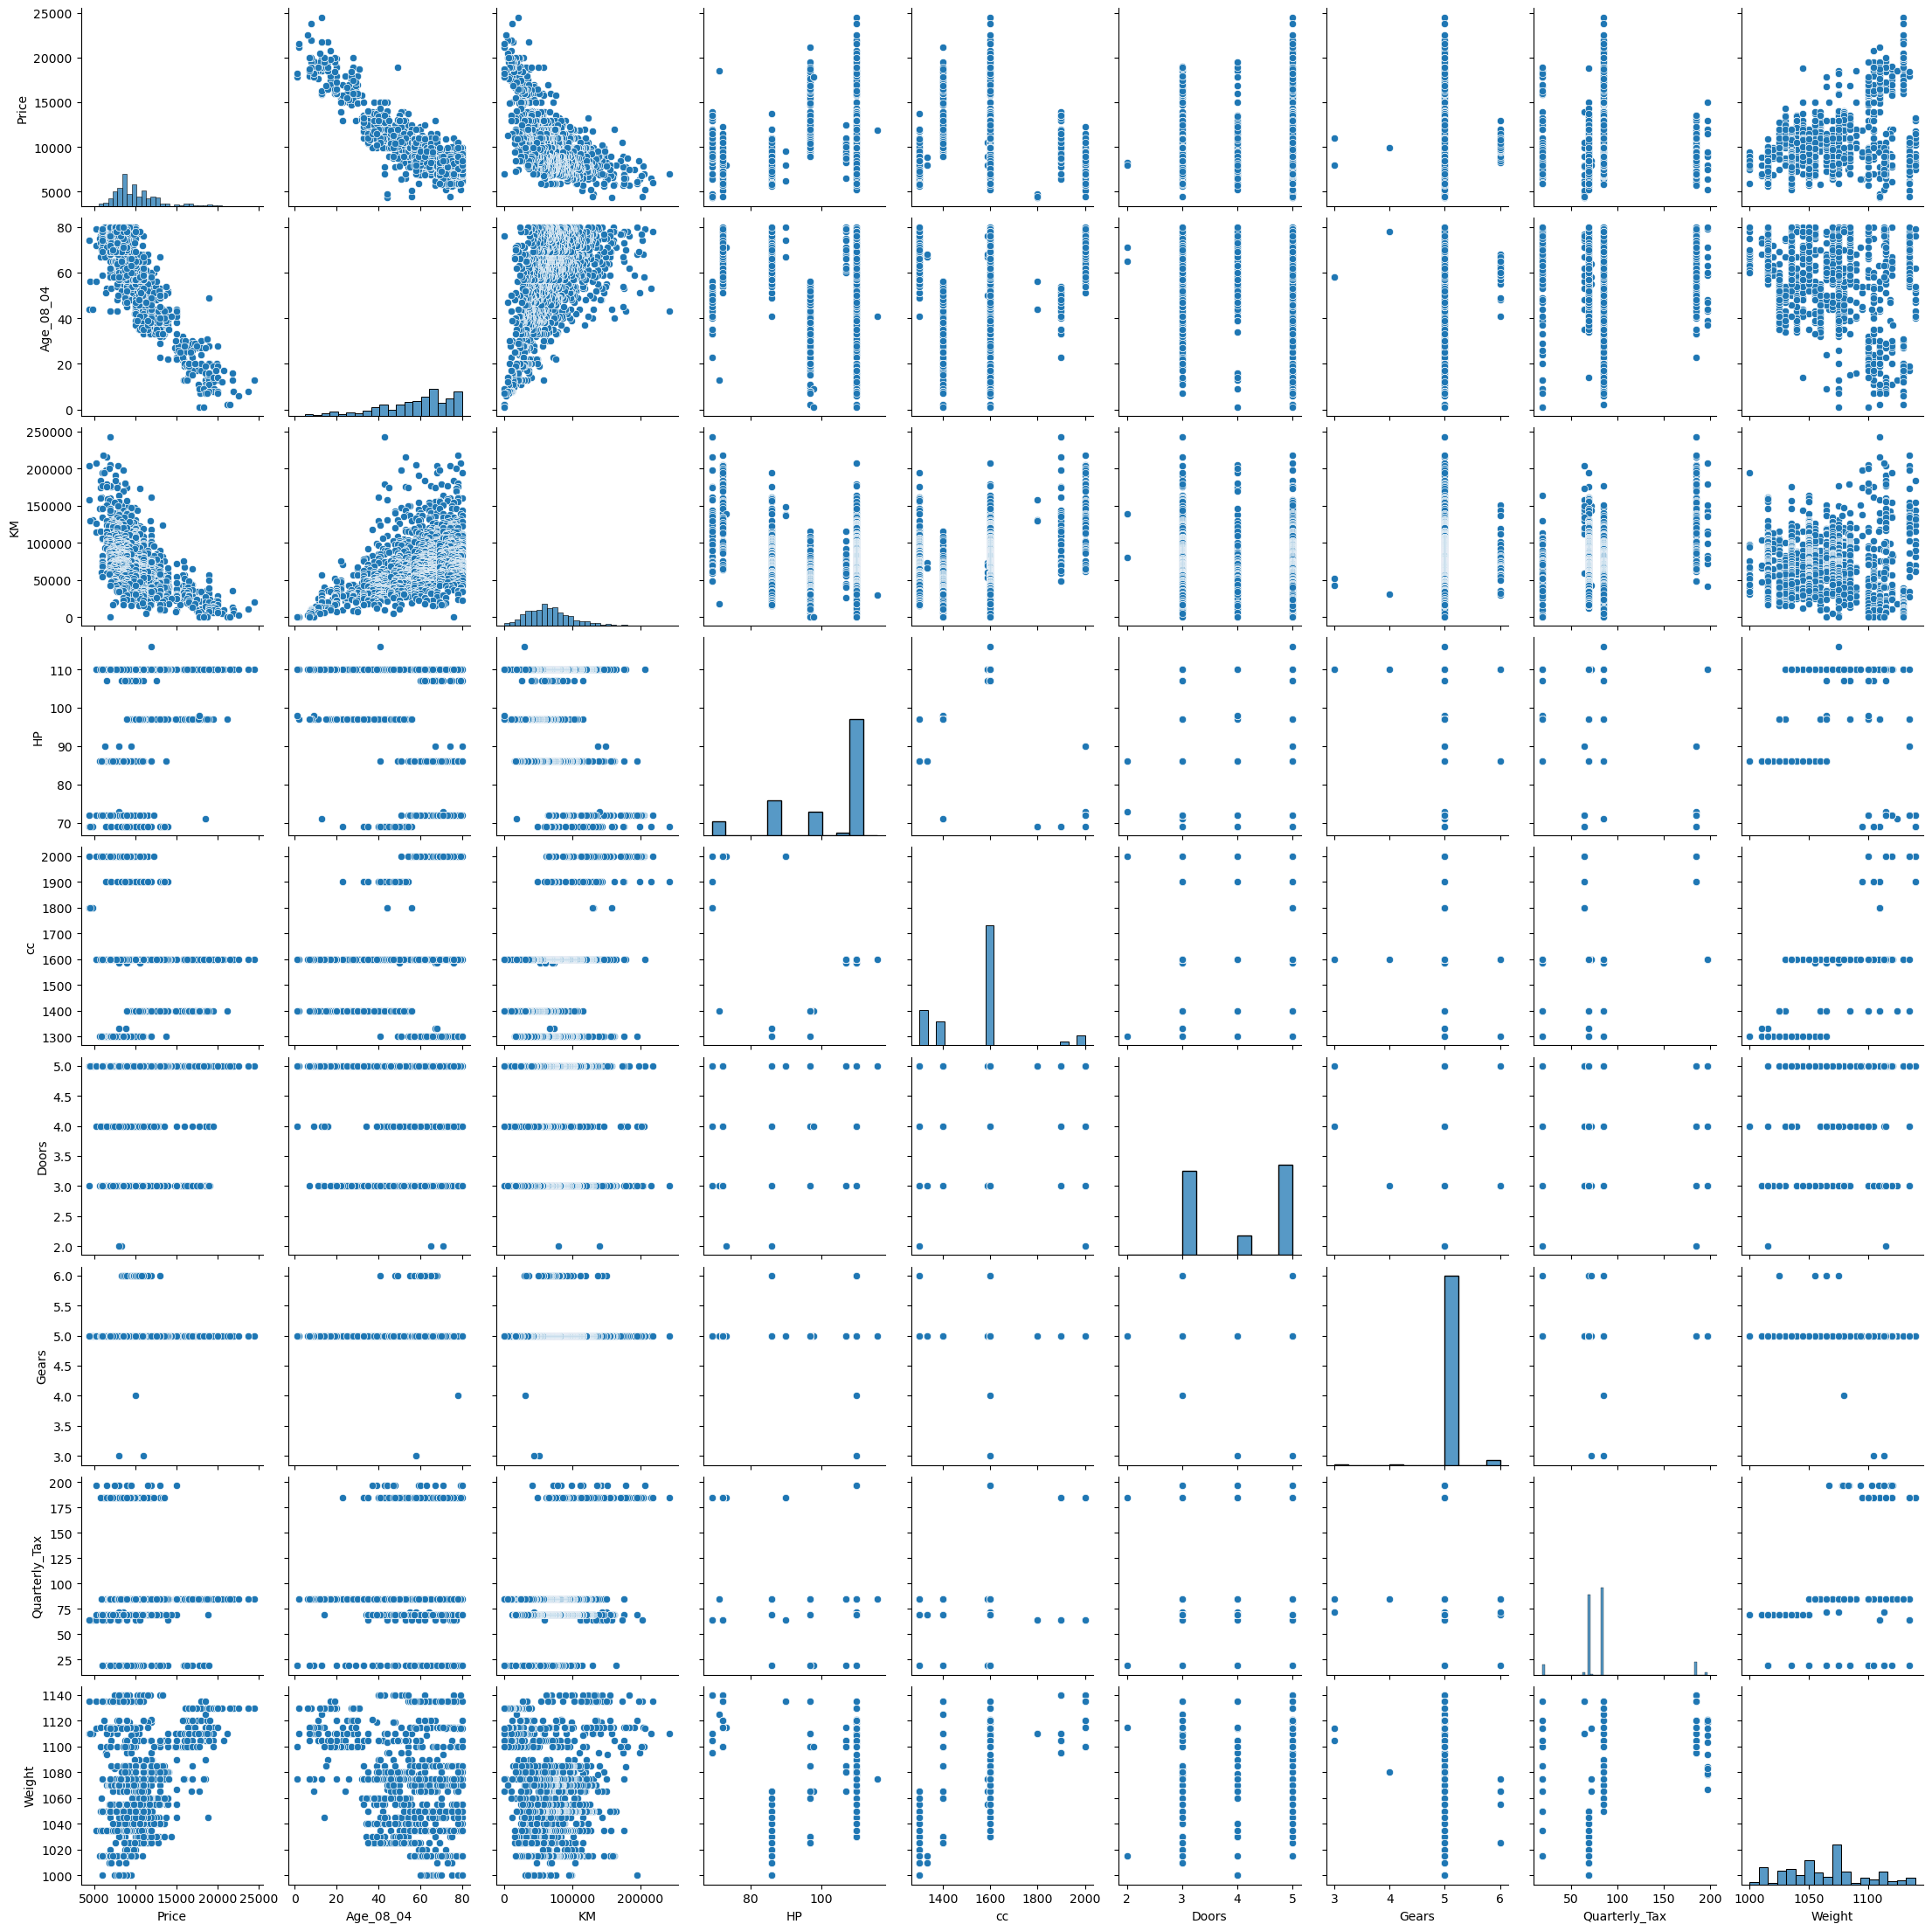

In [18]:
# Residual Analysis
#fit the model with seaborn,statsmodels package

sns.pairplot(df)

In [19]:
#build a model
import statsmodels.formula.api as smf
model = smf.ols("Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     964.3
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        19:39:17   Log-Likelihood:                -11573.
No. Observations:                1363   AIC:                         2.316e+04
Df Residuals:                    1354   BIC:                         2.321e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.27e+04   1854.114     -6.851      0.000   -1.63e+04   -9065.971
Age_08_04      -112.1820      2.500    -44.879      0.000    -117.086    -107.278
KM               -0.0178      0.001    -14.699      0.000      -0.020      -0.015
HP               26.6163      3.230      8.239      0.000      20.279      32.954
cc               -2.9478      0.334     -8.835      0.000      -3.602      -2.293
Doors          -122.7367     40.350     -3.042      0.002    -201.892     -43.581
Gears           459.8697    181.370      2.536      0.011     104.073     815.667
Quarterly_Tax     2.3664      1.488      1.590      0.112      -0.553       5.286
Weight           28.7448      1.799     15.975      0.000      25.215      32.275
==============================================================================
Omnibus:                       86.693   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.128
Skew:                           0.211   Prob(JB):                     5.53e-67
Kurtosis:                       5.279   Cond. No.                     4.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

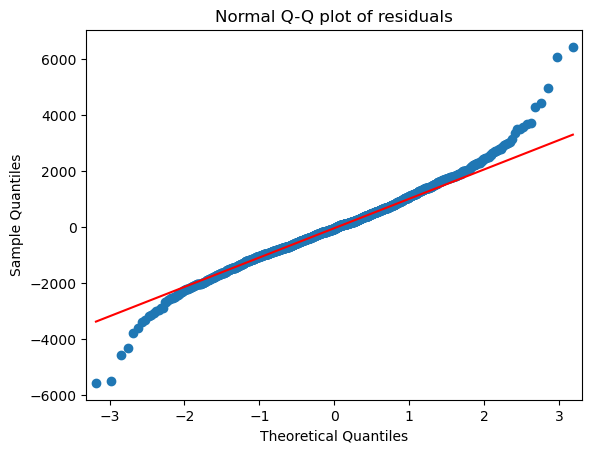

In [20]:

import matplotlib.pyplot as plt
import statsmodels.api as sm

qqplot = sm.qqplot(model.resid,line = "q")
plt.title("Normal Q-Q plot of residuals")
plt.show()


In [21]:
# Create an empty list to store R-squared values
rsquared_values = []

# Define the models and calculate R-squared for each
models = [
    'Price~Age_08_04',
    'Price~Age_08_04+KM',
    'Price~Age_08_04+KM+Weight',
    'Price~Age_08_04+KM+Weight+HP',
    'Price~Age_08_04+KM+Weight+HP+Quarterly_Tax',
    'Price~Age_08_04+KM+Weight+HP+Quarterly_Tax+Doors',
    'Price~Age_08_04+KM+Weight+HP+Quarterly_Tax+Doors+cc',
    'Price~Age_08_04+KM+Weight+HP+Quarterly_Tax+Doors+cc+Gears',
]

for model_formula in models:
    model = smf.ols(model_formula, data=df).fit()
    rsquared = model.rsquared
    rsquared_values.append(rsquared)

In [22]:
# Create a DataFrame to display the R-squared values
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4','Model 5', 'Model 6', 'Model 7', 'Model 8']
rsquared_df = pd.DataFrame({'Model': model_names, 'R-squared': rsquared_values})

print(rsquared_df)

     Model  R-squared
0  Model 1   0.773555
1  Model 2   0.806371
2  Model 3   0.835398
3  Model 4   0.840639
4  Model 5   0.841071
5  Model 6   0.841199
6  Model 7   0.849988
7  Model 8   0.850697
